In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./banana_quality.csv")
data.head()
data['Quality'] = data['Quality'].replace({'Good':1, 'Bad':0})
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [3]:
data.shape

(8000, 8)

## 資料預處理


In [4]:
nulldata = data.isnull().sum()
print(nulldata)

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [5]:
x = data.drop(columns = 'Quality')
y = data[['Quality']]
print("x shape = ", x.shape)
print("y shape = ", y.shape)

x shape =  (8000, 7)
y shape =  (8000, 1)


## 資料分割

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 99)
print("x train = ", x_train.shape)
print("y train = ", y_train.shape)
print("x test = ", x_test.shape)
print("y test = ", y_test.shape)

x train =  (6400, 7)
y train =  (6400, 1)
x test =  (1600, 7)
y test =  (1600, 1)


In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear')

In [8]:
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [9]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.883125

In [10]:
classifier.score(x_train,y_train)

0.876875

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [13]:
LogReg = LogisticRegression(solver = 'liblinear')
DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
Naive = BernoulliNB()
SVC = LinearSVC()
XGBoost = XGBClassifier()
LightGBM = LGBMClassifier()
MLP = MLPClassifier()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [44]:
def model_development(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Test Score = {accuracy_score(y_test,y_pred)}\n")
    print(f"Train Score = {model.score(x_train,y_train)}\n")
    print(f"Classification Report = \n{classification_report(y_test,y_pred)}\n")
    cm = confusion_matrix(y_test,y_pred,labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    print("Confusion Matrix:\n")
    disp.plot()
    plt.show()
    print(f"ROC AUC Score = {roc_auc_score(y_test,y_pred)}\n")
    print(RocCurveDisplay.from_predictions(y_test,y_pred),"\n")
    roc_curve_display = RocCurveDisplay.from_estimator(model,x_test,y_test)
    print(roc_curve_display,"\n")
    print(f"AUC score from estimators = {roc_curve_display.roc_auc}")
    return {"Training Score":model.score(x_train,y_train),
            "Testing Score":accuracy_score(y_test,y_pred),
           "Classifier AUC score":roc_auc_score(y_test,y_pred),
           "Estimator AUC score":roc_curve_display.roc_auc}

In [16]:
results = {}

Test Score = 0.8758333333333334

Train Score = 0.8785714285714286

Classification Report = 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1215
           1       0.87      0.88      0.87      1185

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400


Confusion Matrix:



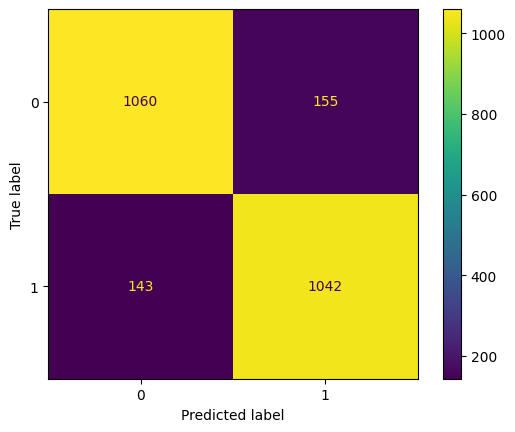

ROC AUC Score = 0.8758764390269314



AUC score from estimators = 0.9467965480717473


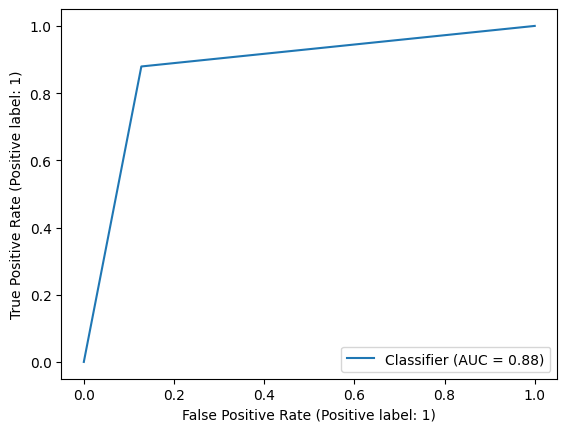

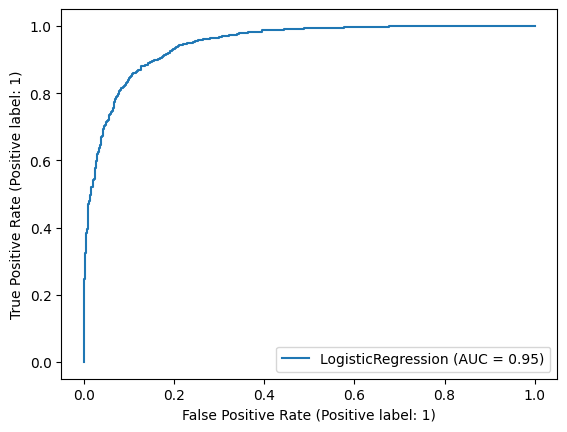

In [46]:
results['Logistic Regression'] = model_development(LogReg)

Test Score = 0.93

Train Score = 1.0

Classification Report = 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1215
           1       0.93      0.93      0.93      1185

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400


Confusion Matrix:



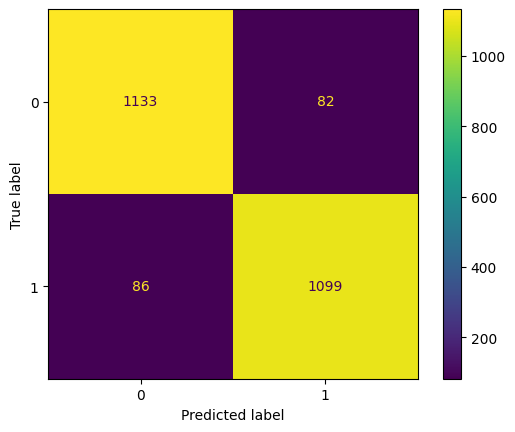

ROC AUC Score = 0.929968224201698



AUC score from estimators = 0.929968224201698


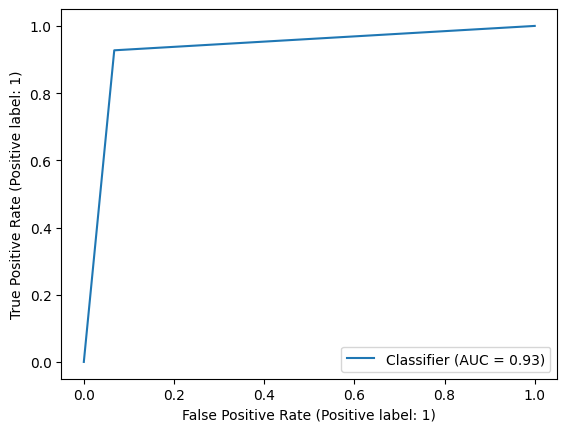

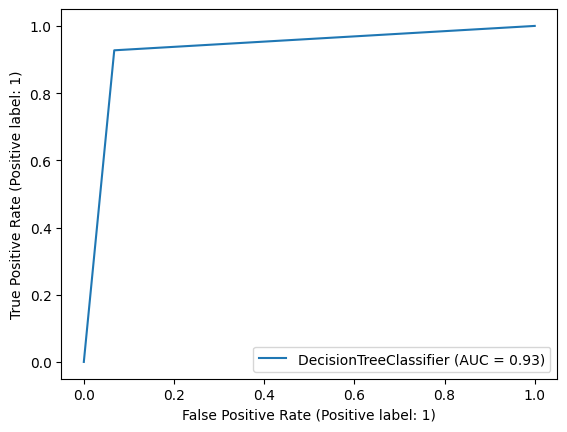

In [34]:
results['Decision Tree'] = model_development(DecisionTree)

Test Score = 0.9725

Train Score = 1.0

Classification Report = 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1215
           1       0.98      0.97      0.97      1185

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400


Confusion Matrix:



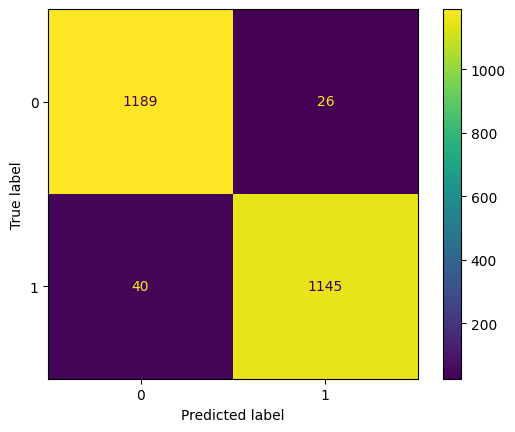

ROC AUC Score = 0.972422774391832



AUC score from estimators = 0.9941219982288898


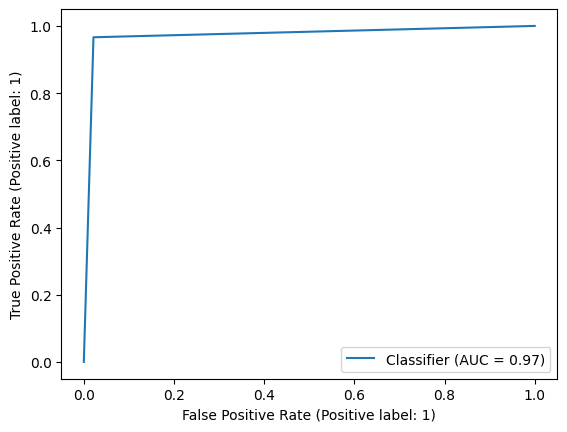

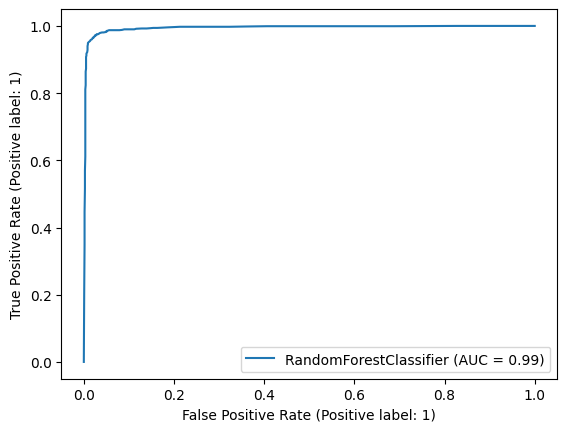

In [25]:
results['Random Forest'] = model_development(RandomForest)

Test Score = 0.7941666666666667

Train Score = 0.8023214285714285

Classification Report = 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1215
           1       0.76      0.84      0.80      1185

    accuracy                           0.79      2400
   macro avg       0.80      0.79      0.79      2400
weighted avg       0.80      0.79      0.79      2400


Confusion Matrix:



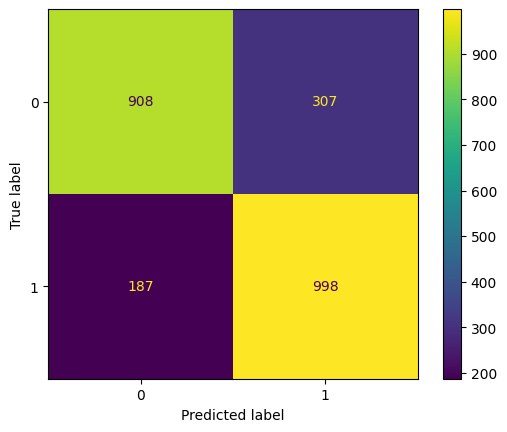

ROC AUC Score = 0.7947595978538313



AUC score from estimators = 0.892440832769009


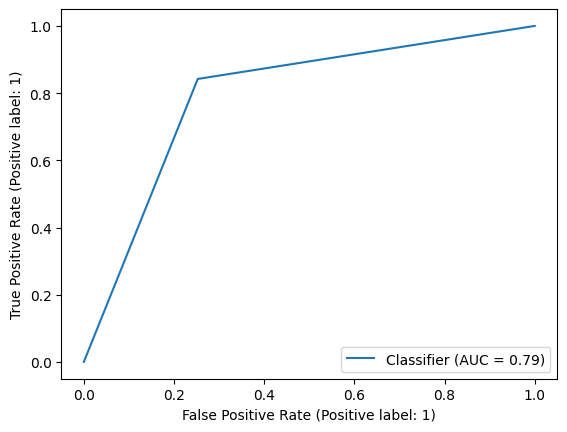

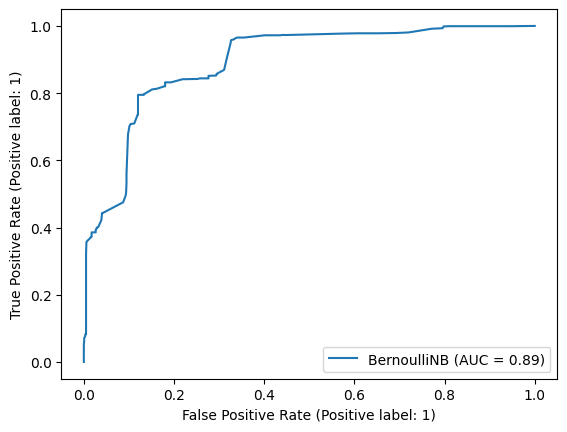

In [26]:
results['Naive Bayes'] = model_development(Naive)

Test Score = 0.8729166666666667

Train Score = 0.8791071428571429

Classification Report = 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1215
           1       0.87      0.87      0.87      1185

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400


Confusion Matrix:



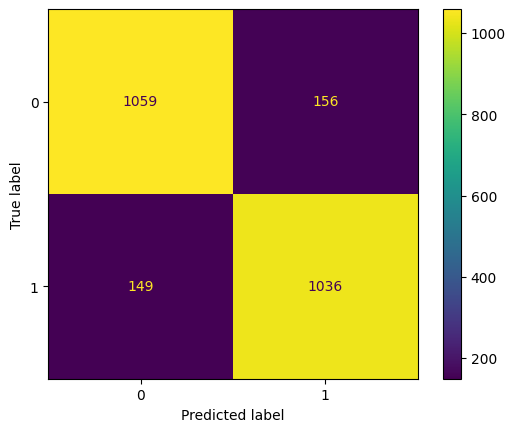

ROC AUC Score = 0.8729332708235662



AUC score from estimators = 0.9467548748936465


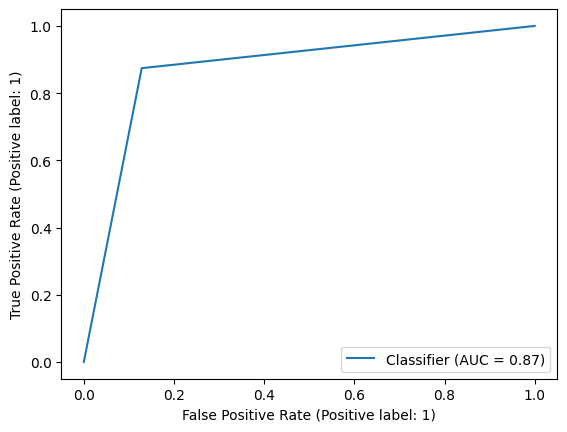

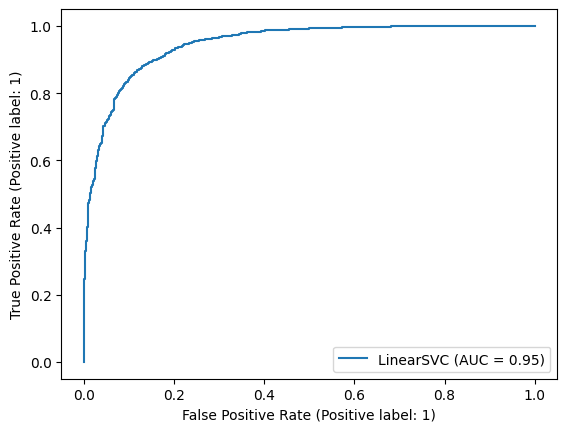

In [27]:
results['Support Vector Machine'] = model_development(SVC)

Test Score = 0.9704166666666667

Train Score = 1.0

Classification Report = 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1215
           1       0.97      0.97      0.97      1185

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400


Confusion Matrix:



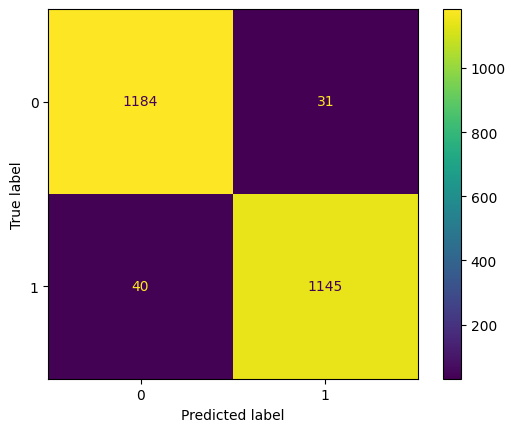

ROC AUC Score = 0.9703651612231078



AUC score from estimators = 0.9938556371655293


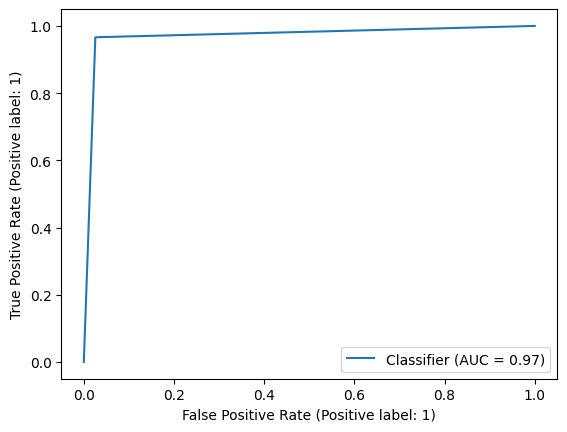

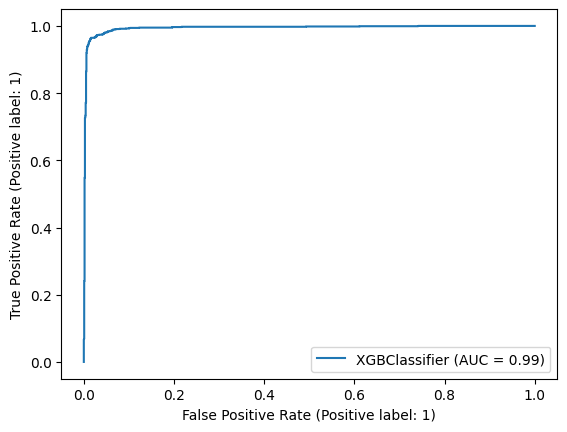

In [28]:
results['XG Boost'] = model_development(XGBoost)

[LightGBM] [Info] Number of positive: 2821, number of negative: 2779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503750 -> initscore=0.015000
[LightGBM] [Info] Start training from score 0.015000
Test Score = 0.97625

Train Score = 0.9985714285714286

Classification Report = 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1215
           1       0.98      0.97      0.98      1185

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400


Confusion Matrix:



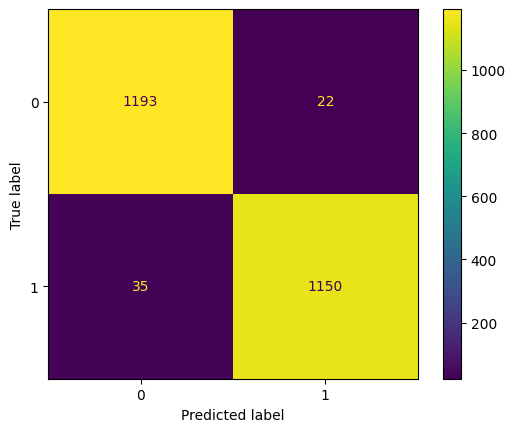

ROC AUC Score = 0.9761785695681617



AUC score from estimators = 0.9948248858328559


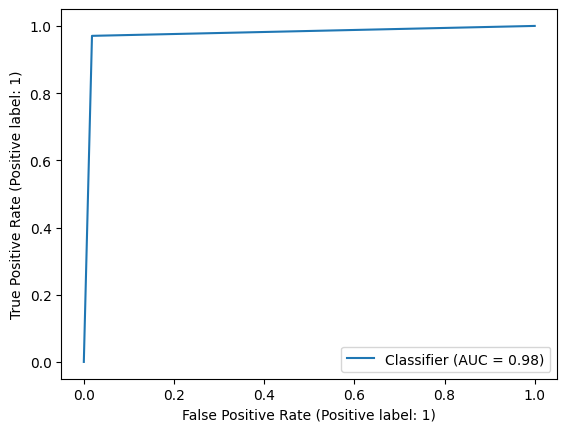

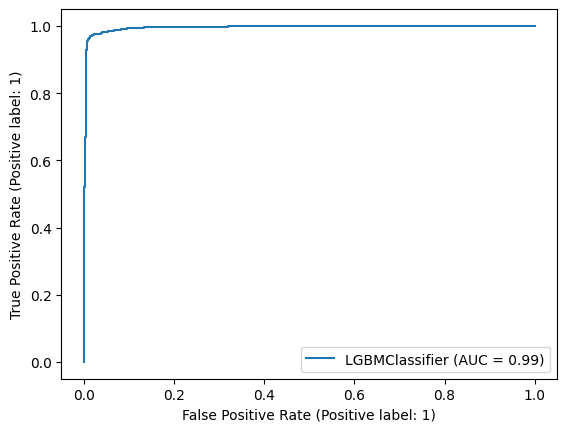

In [29]:
results['Light GBM'] = model_development(LightGBM)

Test Score = 0.98125

Train Score = 0.9857142857142858

Classification Report = 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1215
           1       0.99      0.97      0.98      1185

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400


Confusion Matrix:



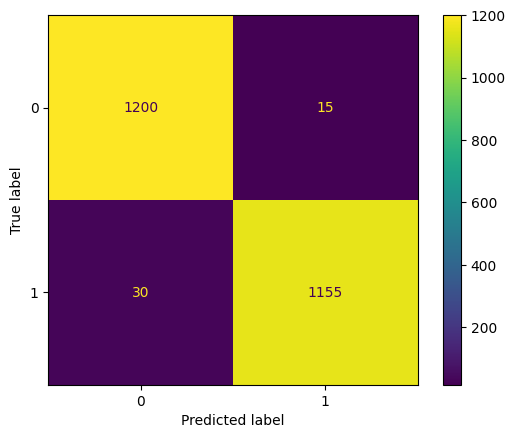

ROC AUC Score = 0.9811689326457258



AUC score from estimators = 0.9956715459012694


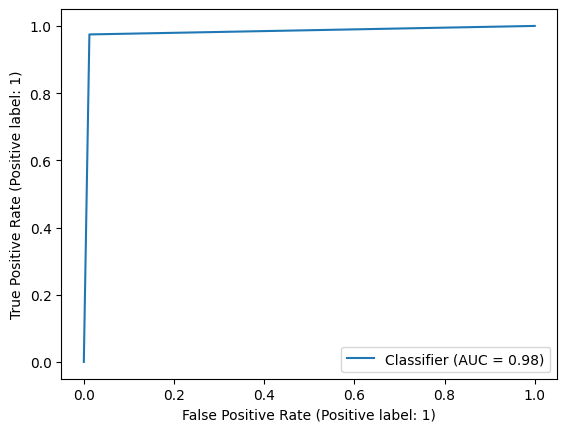

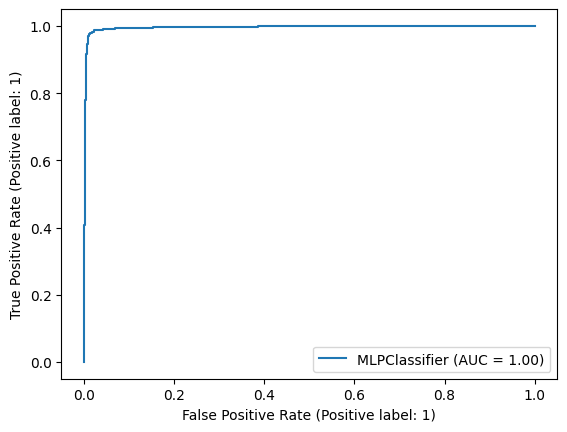

In [30]:
results['MLP Neural Network'] = model_development(MLP)

In [31]:
results_df = pd.DataFrame(results)
results_df 

,Logistic Regression,Decision Tree,Random Forest,Naive Bayes,Support Vector Machine,XG Boost,Light GBM,MLP Neural Network
Training Score,0.878571,1.000000,1.000000,0.802321,0.879107,1.000000,0.998571,0.985714
Testing Score,0.875833,0.932500,0.972500,0.794167,0.872917,0.970417,0.976250,0.981250
Classifier AUC score,0.875876,0.932489,0.972423,0.794760,0.872933,0.970365,0.976179,0.981169
Estimator AUC score,0.946797,0.932489,0.994122,0.892441,0.946755,0.993856,0.994825,0.995672
